Dataset Shape: (1118669, 34)


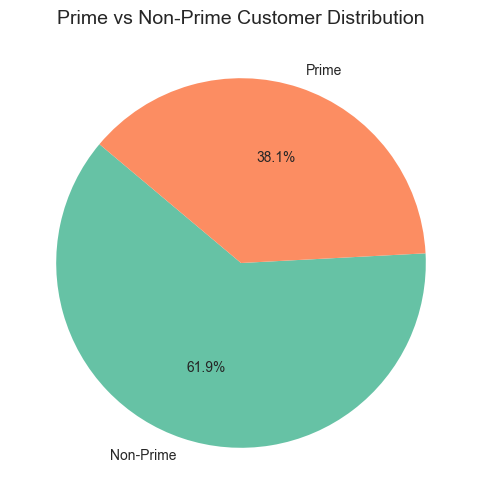

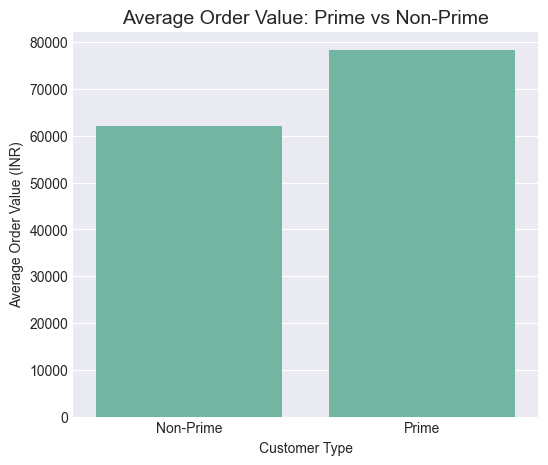

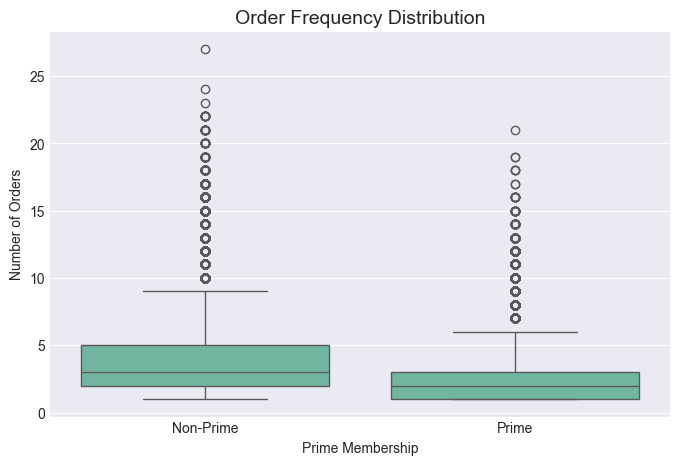

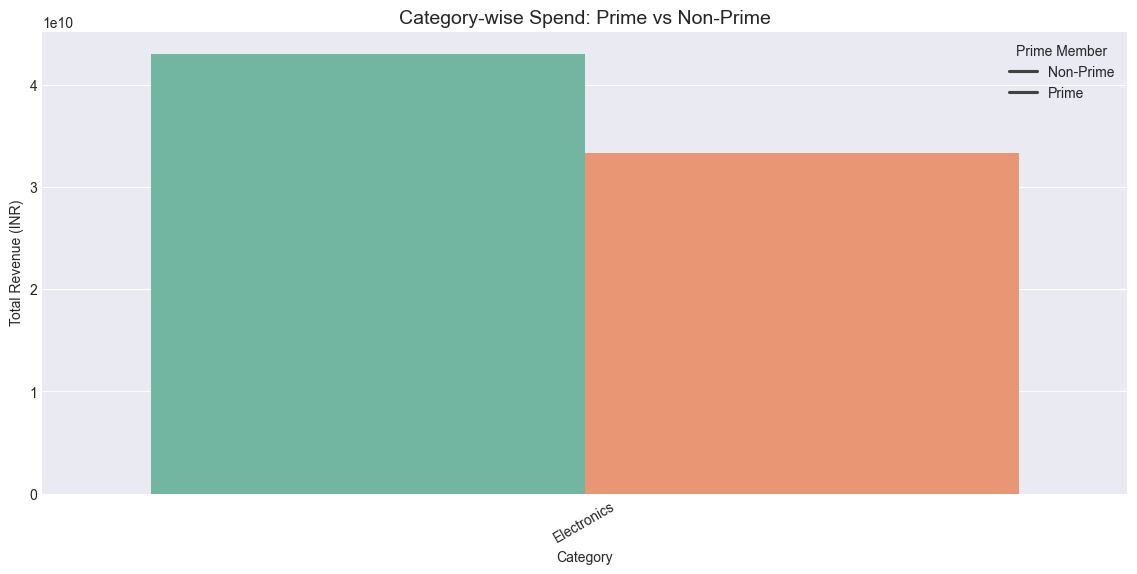

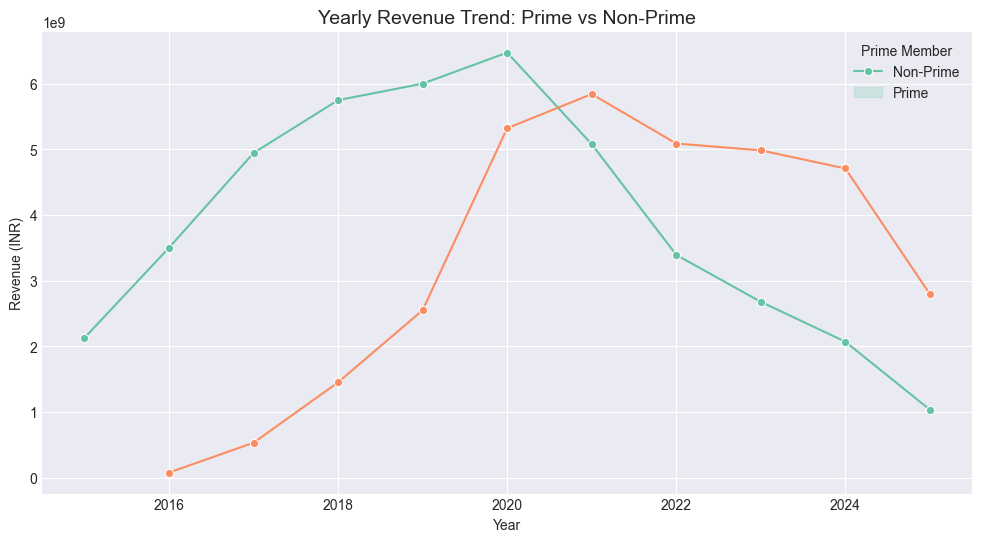

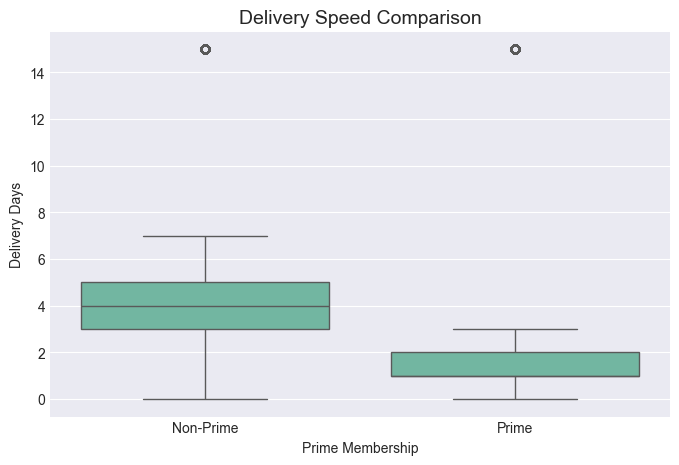

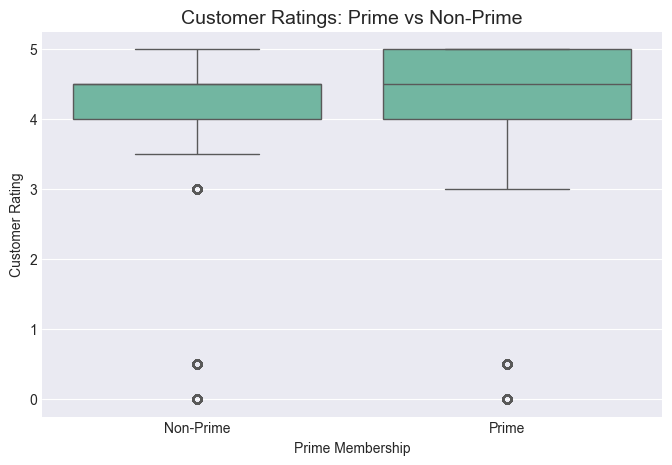

===== PRIME VS NON-PRIME SUMMARY =====


,avg_order_value,avg_orders_per_customer,avg_delivery_days,avg_rating
Non-Prime,62124.602974,194159,4.309679,4.152866
Prime,78329.896405,160460,1.712479,4.223330


In [1]:
# =====================================================
# EDA 05: PRIME MEMBERSHIP IMPACT ANALYSIS
# QUESTION:
# Q6 - Compare Prime vs Non-Prime customer behavior
# =====================================================

# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

# =========================
# LOAD MASTER DATASET
# =========================
DATA_PATH = "../master/amazon_india_master_2015_2025.csv"
df = pd.read_csv(DATA_PATH)

print("Dataset Shape:", df.shape)

# =========================
# BASIC CLEANING
# =========================
df["is_prime_member"] = df["is_prime_member"].astype(bool)
df["final_amount_inr"] = pd.to_numeric(df["final_amount_inr"], errors="coerce")
df["order_year"] = df["order_year"].astype(int)

df = df.dropna(subset=["final_amount_inr", "category"])

# =====================================================
# Q6.1: PRIME VS NON-PRIME CUSTOMER COUNT
# =====================================================
prime_counts = df["is_prime_member"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    prime_counts.values,
    labels=["Non-Prime", "Prime"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Prime vs Non-Prime Customer Distribution", fontsize=14)
plt.show()

# =====================================================
# Q6.2: AVERAGE ORDER VALUE (AOV)
# =====================================================
aov = (
    df.groupby("is_prime_member")["final_amount_inr"]
    .mean()
    .reset_index()
)

aov["Membership"] = aov["is_prime_member"].map({True: "Prime", False: "Non-Prime"})

plt.figure(figsize=(6, 5))
sns.barplot(data=aov, x="Membership", y="final_amount_inr")
plt.title("Average Order Value: Prime vs Non-Prime", fontsize=14)
plt.xlabel("Customer Type")
plt.ylabel("Average Order Value (INR)")
plt.show()

# =====================================================
# Q6.3: ORDER FREQUENCY PER CUSTOMER
# =====================================================
order_freq = (
    df.groupby(["customer_id", "is_prime_member"])
    .size()
    .reset_index(name="order_count")
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=order_freq,
    x="is_prime_member",
    y="order_count"
)
plt.title("Order Frequency Distribution", fontsize=14)
plt.xlabel("Prime Membership")
plt.ylabel("Number of Orders")
plt.xticks([0, 1], ["Non-Prime", "Prime"])
plt.show()

# =====================================================
# Q6.4: CATEGORY PREFERENCE BY PRIME STATUS
# =====================================================
category_pref = (
    df.groupby(["category", "is_prime_member"])["final_amount_inr"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_pref,
    x="category",
    y="final_amount_inr",
    hue="is_prime_member"
)
plt.title("Category-wise Spend: Prime vs Non-Prime", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Revenue (INR)")
plt.legend(title="Prime Member", labels=["Non-Prime", "Prime"])
plt.xticks(rotation=30)
plt.show()

# =====================================================
# Q6.5: YEARLY SPENDING TREND (PRIME VS NON-PRIME)
# =====================================================
yearly_spend = (
    df.groupby(["order_year", "is_prime_member"])["final_amount_inr"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_spend,
    x="order_year",
    y="final_amount_inr",
    hue="is_prime_member",
    marker="o"
)
plt.title("Yearly Revenue Trend: Prime vs Non-Prime", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.legend(title="Prime Member", labels=["Non-Prime", "Prime"])
plt.show()

# =====================================================
# Q6.6: DELIVERY SPEED COMPARISON
# =====================================================
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="is_prime_member",
    y="delivery_days"
)
plt.title("Delivery Speed Comparison", fontsize=14)
plt.xlabel("Prime Membership")
plt.ylabel("Delivery Days")
plt.xticks([0, 1], ["Non-Prime", "Prime"])
plt.show()

# =====================================================
# Q6.7: CUSTOMER RATING COMPARISON
# =====================================================
rating_df = df.dropna(subset=["customer_rating"])

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=rating_df,
    x="is_prime_member",
    y="customer_rating"
)
plt.title("Customer Ratings: Prime vs Non-Prime", fontsize=14)
plt.xlabel("Prime Membership")
plt.ylabel("Customer Rating")
plt.xticks([0, 1], ["Non-Prime", "Prime"])
plt.show()

# =====================================================
# SUMMARY STATISTICS
# =====================================================
summary = df.groupby("is_prime_member").agg(
    avg_order_value=("final_amount_inr", "mean"),
    avg_orders_per_customer=("customer_id", "nunique"),
    avg_delivery_days=("delivery_days", "mean"),
    avg_rating=("customer_rating", "mean")
)

summary.index = ["Non-Prime", "Prime"]

print("===== PRIME VS NON-PRIME SUMMARY =====")
display(summary)